In [624]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import itertools

In [702]:
# Load exit data
runDir = '../rundata/'
#fName = 'strauss_run5'
fName = 'straussunits_alt0_run6'
#fName = 'alt0_run2'
rawData = np.loadtxt(runDir + fName + '.csv', delimiter = ',')

# Parse out the coordinates, energies and times
exitData = {'r': rawData[:,0], 'th': 180.0 / np.pi * rawData[:,1], 'ph': 180.0 / np.pi * rawData[:,2], 'ek': rawData[:,3], 's': rawData[:,4] / (24.0 * 3600.0)}

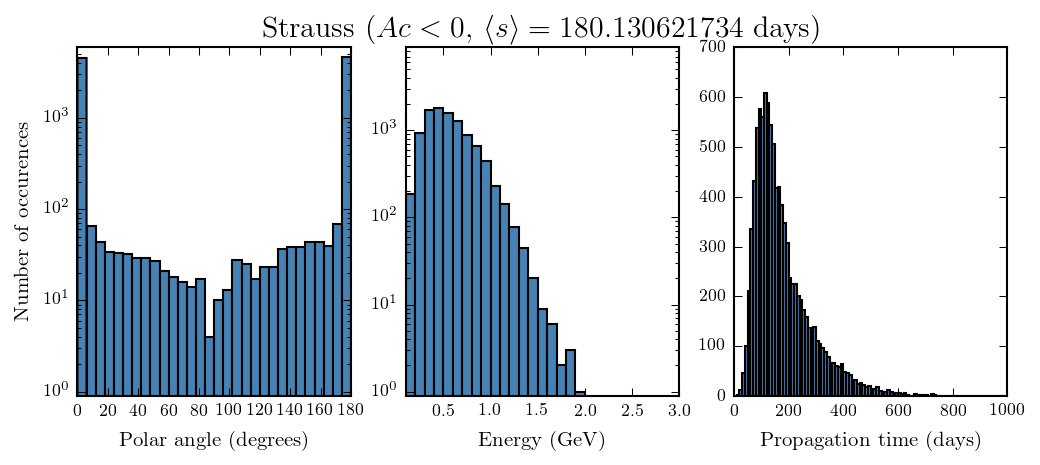

In [706]:
# Create figure for plotting polar angle, energy and time at exit
fig = plt.figure(figsize = (8, 3))
thAx = fig.add_subplot(1, 3, 1)
ekAx = fig.add_subplot(1, 3, 2)
sAx = fig.add_subplot(1, 3, 3)

# Fill the histograms
thData = []
sData = []
ekData = []
for i in range(len(exitData['th'])):
    #if exitData['s'][i] < 100:
    thData.append(exitData['th'][i])
    sData.append(exitData['s'][i])
    ekData.append(exitData['ek'][i])
        
thAx.hist(thData, bins = np.arange(0.0, 180.0 + 6.0, 6.0), log = True)
ekAx.hist(ekData, bins = np.arange(0.0, 3.0 + 0.1, 0.1), log = True)
sMin = 0.0
sMax = 1000.0
sWidth = 10.0
sAx.hist(sData, bins = np.arange(sMin, sMax, sWidth))

# Scale axes
axScale = len(exitData['th']) / 10000.0

# Set up axes and labels
thAx.set_ylim(0.9, axScale*6000.0)
ekAx.set_ylim(0.9, axScale*9000.0)
sAx.set_ylim(0.9, axScale*700.0) #(700.0 if fName[1:3] == 'lt' else 500.0))
thAx.set_ylabel('Number of occurences')
ekAx.set_xlim(0.1, 3.0)
ekAx.set_xlabel('Energy (GeV)')
ekAx.set_title(r'Strauss $(Ac < 0$, $\langle s \rangle = 180.130621734$ days)')
thAx.set_xlim(0.0, 180.0)
thAx.set_xlabel('Polar angle (degrees)')
sAx.set_xlim(0.0, 1000.0)
sAx.set_xlabel('Propagation time (days)')

plt.show()
#fig.savefig('../figures/' + fName + '.pdf')

In [707]:
# Get expected propagation time
sCounts, sBins = np.histogram(exitData['s'], bins = np.arange(sMin, sMax, sWidth))
# Get probabilities for each bin
sProbs = (sCounts + 0.0) / len(exitData['s'])
# Get bin centers
sBins = sBins[1:]
sBins -= sWidth / 2.0

propTime = sum(t * p for t, p in zip(sBins, sProbs))

print('Expected propagation time: ' + str(propTime) + ' days')
print('Should be ~300 days for Ac > 0, ~180 days for Ac < 0')

Expected propagation time: 178.869 days
Should be ~300 days for Ac > 0, ~180 days for Ac < 0
